# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../balanced_spam_data.csv", encoding = "ISO-8859-1")

# Data Cleaning

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [4]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

In [5]:
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop,inplace=True, axis=1)

In [6]:
data

sms labels
0     Good afternoon starshine! How's my boytoy? Doe...    ham
1     My sis is catching e show in e afternoon so i'...    ham
2                                What happened to date?    ham
3                              K:)k.are you in college?    ham
4                           S but mostly not like that.    ham
...                                                 ...    ...
2983  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986  Urgent UR awarded a complimentary trip to Euro...   spam
2987                               Where r we converge?    ham

[2988 rows x 2 columns]

In [7]:
def clean_text(text):
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [8]:
data['sms'] = data['sms'].apply(clean_text)

In [9]:
data

sms labels
0     good afternoon starshin how boytoy crave yet a...    ham
1     si catch e show e afternoon im watch w c u wan...    ham
2                                           happen date    ham
3                                          kkare colleg    ham
4                                           mostli like    ham
...                                                 ...    ...
2983  mob everi week txt nokia txting get tell mate ...   spam
2984  sm ac sptv new jersey devil detroit red wing p...   spam
2985  urgent pleas call abta complimentari spanish h...   spam
2986  urgent ur award complimentari trip eurodisinc ...   spam
2987                                          r converg    ham

[2988 rows x 2 columns]

#  RVM classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn import metrics

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['labels'], test_size = 0.2, random_state = 2)

In [12]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [13]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['sms'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

# Building RVM CLassifier from sklearn module



!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip


In [14]:
X_train = X_train.toarray()

import time
start = time.time()

from skrvm import RVR
clf = RVR(kernel='linear')
clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for RVMR model on balanced data: {stop - start}s")


from sklearn_rvm import EMRVC
model = EMRVC(kernel="poly")
model.fit(X_train, y_train)

import pickle

pickle.dump(clf, open("../models/rvmr-spam-model-balanced-data", 'wb'))

# load the model from disk

In [15]:
import pickle
loaded_model = pickle.load(open("../models/rvmr-spam-model-balanced-data", 'rb'))

In [16]:
y_pred = loaded_model.predict(X_test)

In [17]:
y_pred

array([ 1.01788107e+00,  9.63723287e-01,  1.11548331e+00,  9.94484143e-01,
        9.66590670e-01, -1.15317850e-01,  4.70225095e-02,  1.12070241e+00,
        1.60626318e-01,  4.83414480e-01,  7.36247436e-02,  9.28814795e-01,
        9.40588337e-01, -9.97985169e-02,  3.43760891e-01,  1.03797490e+00,
        6.12957201e-01,  1.56989250e-01,  7.71485740e-01, -5.61630747e-02,
       -6.87762069e-03,  3.39132842e-01, -1.88135270e-02, -2.04840402e-01,
        9.33014075e-01, -3.21128386e-02,  7.13844978e-02,  9.12170648e-01,
       -3.25505307e-02,  7.86842214e-01,  1.11614030e+00,  1.17221559e-01,
        7.09169355e-01,  3.94983249e-01,  1.13585875e+00,  4.65990198e-02,
        2.25105088e-01,  9.66590670e-01,  1.08096781e+00,  8.93241275e-01,
        1.38179584e-01,  9.74121538e-01, -8.01662045e-02,  9.65525141e-01,
        1.18152101e+00,  7.40564391e-01,  1.19127530e+00,  8.51499821e-01,
        7.04504876e-02,  9.59246727e-01,  3.31586583e-01, -4.98169615e-02,
        1.47118168e-01,  

In [18]:
y_pred = y_pred.tolist()
rvm_predictions = []
for pred in y_pred:
    if pred < 0.5:
        rvm_predictions.append(0)
    else:
        rvm_predictions.append(1)

In [19]:
test_result_data = pd.read_csv("../results/test_result_data_with_SVM_NaiveBayes_LSTM_balanced.csv")
test_result_data['RVM prediction'] = rvm_predictions
test_result_data.to_csv("../results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_balanced.csv")

In [20]:
rvm_predictions

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


## Evaluate model



In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, rvm_predictions))


Accuracy: 0.9682274247491639


# Use loaded model for predictiing to new data

In [22]:
# Predict for unseen data
test_data = "Congratulations. You have won a lottery of 1,00,000 pounds. Please click here to claim this lottery."
cleaned_test_data = clean_text(test_data)
test_data_embedding = Tfidf_vect.transform([cleaned_test_data])

In [23]:
test_data_embedding = test_data_embedding.toarray()
test_data_prediction = loaded_model.predict(test_data_embedding)[0].item()

In [24]:
def get_result(prediction_label):
    if prediction_label == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [25]:
get_result(test_data_prediction)

Message is NOT Spam


## Visualizing evaluation metrics

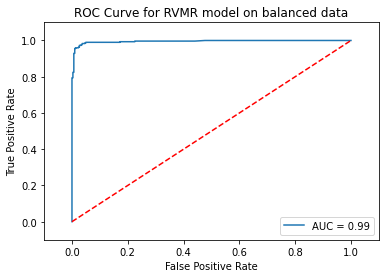

In [26]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve for RVMR model on balanced data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('../results/rvmr_roc_balanced.jpg')
plt.show()


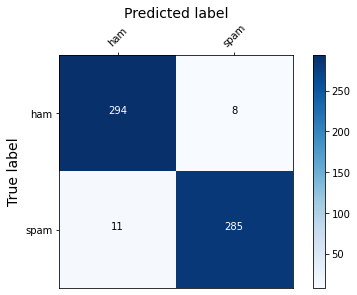

In [27]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,rvm_predictions)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.savefig('../results/rvmr_confusion_matrix_balanced.jpg')
plt.show()


# Implement k fold cross validation



from sklearn.model_selection import KFold
import numpy as np


Encoder = LabelEncoder()
y = Encoder.fit_transform(data['labels'])
X= data['sms']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


from sklearn.metrics import classification_report

accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    
    X_train = X_train.toarray()
    clf = RVR(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = y_pred.tolist()
    rvm_predictions = []
    for pred in y_pred:
        if pred < 0.5:
            rvm_predictions.append(0)
        else:
            rvm_predictions.append(1)
    print(confusion_matrix(y_test, rvm_predictions))
    print(classification_report(y_test, rvm_predictions))
    accuracy = metrics.accuracy_score(y_test, rvm_predictions)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    
    print('\n')

accuracy_list = [i*100 for i in accuracy_list]

fold_list = [1,2,3,4,5,6,7,8,9,10]

import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([95,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 11, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results of rvm model')
fig.savefig('../results/k_fold_cross_validation_result_rvmr_balanced.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()
